# Using Neural Network to classify text.

### Importing Packages

In [7]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Loading dataset

In [13]:
iris_df = pd.read_csv("/Volumes/DriveB/Ex_Files_Deep_Learning_Getting_Started/Exercise Files/iris.csv")

print(iris_df.head())


 Loading the Data of Iris Dataset :
----------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris_df['Species'] = label_encoder.fit_transform(iris_df['Species'])
iris_df['Species'] 

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [15]:
np_iris = iris_df.to_numpy()
X_data = np_iris[:, 0:4] # all rows and 0 to 3 columns, in total 4 columns
Y_data = np_iris[:, 4] # all rows and 4th column

In [16]:
print("\nFeatures before scaling : \n-------------------------")
print(X_data[:5, :])
print("\nTarget variable before scaling :\n-------------------")
print(Y_data[:5])


Features before scaling : 
-------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target variable before scaling :
-------------------
[0. 0. 0. 0. 0.]


### Scaling the data to reduce gradient descent and to avoid data skewing.

In [17]:
scale = StandardScaler().fit(X_data)

X_data = scale.transform(X_data)

In [18]:
Y_data = tf.keras.utils.to_categorical(Y_data,3)
Y_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [19]:
print("\nFeatures after scaling :\n------------------")
print(X_data[:5,:])
print("\nTarget variable data after one-hot-encoding :\n-------------")
print(Y_data[:5,:])


Features after scaling :
------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target variable data after one-hot-encoding :
-------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### Splitting the data into train, test sets

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.10)

print("\nTrainig set and test set Dimensions :\n-----------")
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Trainig set and test set Dimensions :
-----------
(135, 4) (15, 4) (135, 3) (15, 3)


### Creating a Model Architecture

In [30]:
from tensorflow import keras

num_classes = 3

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(128,
                             input_shape = (4,),
                             name = "Hidden-Layer-1",
                             activation = 'relu'))
model.add(keras.layers.Dense(128,
                            name = 'Hidden-Layer-2',
                            activation = 'relu'))

model.add(keras.layers.Dense(num_classes,
                             name = "Output-Layer",
                             activation = "softmax"
                             ))
model.compile(loss= 'categorical_crossentropy',
               optimizer='adam', 
               metrics = ['accuracy'])

model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

### Training model

In [31]:
VERBOOSE = 1

BATCH_SIZE = 32

EPOCHS = 10

VALIDATION_SPLIT = 0.2

print("\nTraining Progress :\n----------------------")

history = model.fit(X_train, Y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOOSE,
                    validation_split = VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------")



Training Progress :
----------------------
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2382 - loss: 1.1164 - val_accuracy: 0.8519 - val_loss: 0.9565
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7720 - loss: 0.9252 - val_accuracy: 0.8519 - val_loss: 0.8059
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7961 - loss: 0.7718 - val_accuracy: 0.8519 - val_loss: 0.6788
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7914 - loss: 0.6701 - val_accuracy: 0.8519 - val_loss: 0.5762
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8197 - loss: 0.5663 - val_accuracy: 0.8519 - val_loss: 0.4955
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8223 - loss: 0.5101 - val_accuracy: 0.8519 - val_loss: 0.4330
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8083 - loss: 0.4609 - val_accuracy: 0.8519 - val_loss: 0.3852
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.3928 - val

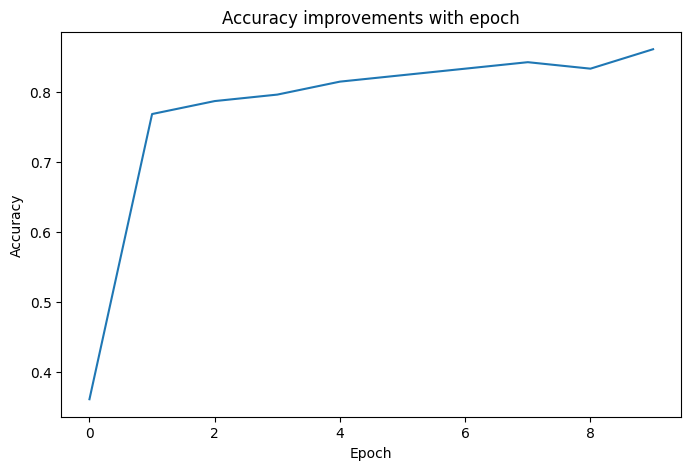

In [34]:
print("\nEvaluation")
model.evaluate(X_test, Y_test)


Evaluation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9333 - loss: 0.2053


[0.20527805387973785, 0.9333333373069763]

###### np.argmax is used to find the index of the maximum value in an array. In the context of a classification problem using a neural network, the model's output for a prediction is typically an array of probabilities for each class. np.argmax helps determine which class has the highest probability, thereby indicating the predicted class.

###### Here’s why it is used in this scenario:

###### When the model predicts the class for an input, it outputs a probability distribution across all possible classes. For example, if there are three classes, the output might look something like [0.1, 0.2, 0.7], meaning there is a 10% probability for the first class, 20% for the second class, and 70% for the third class.

###### The class with the highest probability is the model's prediction for that input. np.argmax is used to find the index of the maximum value in this probability array, which corresponds to the predicted class.

In [36]:
# Make predictions using the test set
test_index = 0  # Index of the test set sample to predict
raw_predictions = model.predict(predicted_input)
print("Raw Prediction Output (Probabilities):", raw_predictions)

# Get the class with the highest probability
prediction = np.argmax(raw_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Raw Prediction Output (Probabilities): [[0.9870443  0.00728927 0.00566654]]
Prediction is ['setosa']


### Result: 10 epoches were run, the loss has reduced from 1.1164 to 0.3253 for train set, and from 0.9565 to 0.2979 for validation set. The accuracy of train set is 87% where accuracy of validation set is 85%.
### Test set accuracy: 93% - loss: 0.2053

### Therefore, error is significantly reduced, but by comparing train and test set accuracy score, model is underfittig, model could not generalize the unseen data accurately.